In [24]:
import json
import random
import datetime
import pandas as pd
import numpy as np
import os
import glob
import subprocess
import time
from IPython.core.display import HTML
from sqlalchemy import create_engine
import configparser
import matplotlib.pyplot as plt

In [14]:
tmp_data_12 = pd.read_csv("data/BPH1_2.txt", sep='\t', names=['x', 'y'])

In [15]:
tmp_data_13 = pd.read_csv("data/BPH1_3.txt", sep='\t', names=['x', 'y'])

In [6]:
tmp_data

,x,y
0,400.438,33.66060
1,402.477,15.24740
2,404.514,-7.54441
3,406.551,29.86170
4,408.587,1.52634
...,...,...
764,1792.230,103.30800
765,1793.850,109.47600
766,1795.460,77.75810
767,1797.080,96.63470


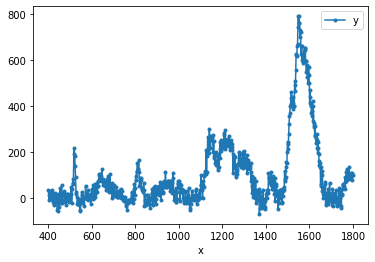

In [16]:
tmp_data_12.plot(x='x', y='y', marker='.')

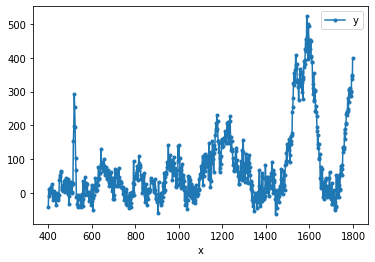

In [17]:
tmp_data_13.plot(x='x', y='y', marker='.')

In [19]:
tmp = tmp_data_12.merge(tmp_data_13, on='x', how='outer')

In [20]:
tmp

,x,y_x,y_y
0,400.438,33.66060,-42.205200
1,402.477,15.24740,11.988200
2,404.514,-7.54441,-9.092630
3,406.551,29.86170,6.361050
4,408.587,1.52634,-0.011545
...,...,...,...
764,1792.230,103.30800,287.985000
765,1793.850,109.47600,346.035000
766,1795.460,77.75810,350.099000
767,1797.080,96.63470,338.117000


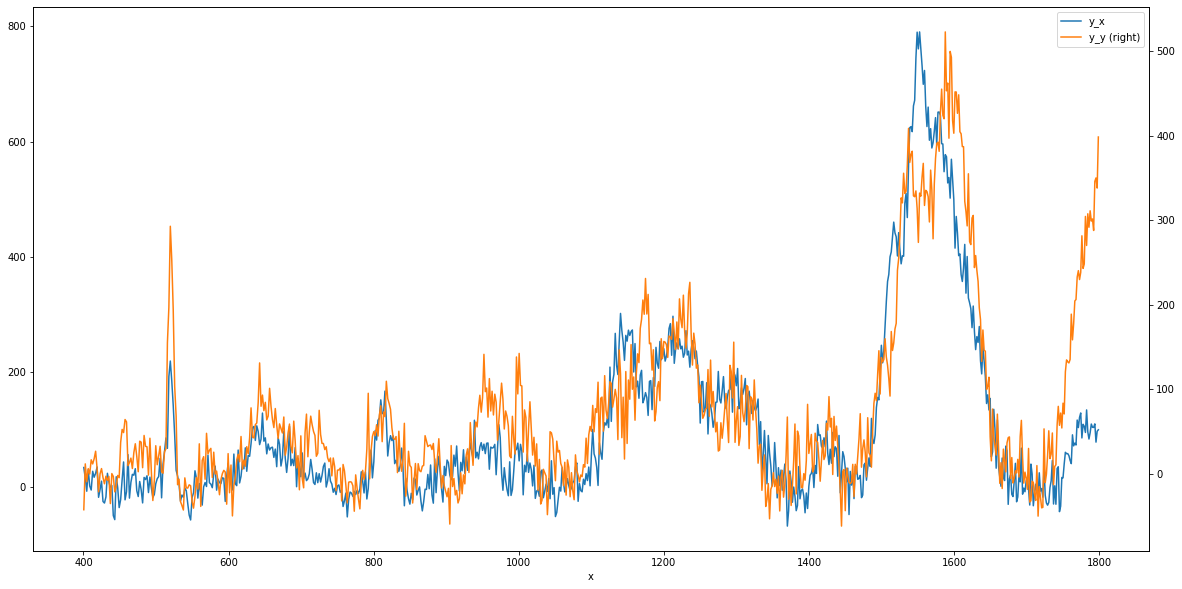

In [25]:
fig, ax = plt.subplots(figsize=(20,10)) 
tmp.plot(x = 'x', y = 'y_x', ax = ax) 
tmp.plot(x = 'x', y = 'y_y', ax = ax, secondary_y = True) 

In [26]:
tmp['y_ave'] = (tmp['y_x'] + tmp['y_y'])/2

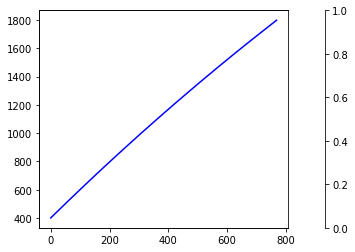

In [27]:
fig, ax = plt.subplots()
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.15))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

tmp.x.plot(ax=ax, style='b-')
# same ax as above since it's automatically added on the right
# df.B.plot(ax=ax, style='r-', secondary_y=True)
# df.C.plot(ax=ax3, style='g-')

# # add legend --> take advantage of pandas providing us access
# # to the line associated with the right part of the axis
# ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0], ax3.get_lines()[0]],\
#            ['A','B','C'], bbox_to_anchor=(1.5, 0.5))